In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('Data/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
data.drop(columns='Address', inplace=True)

<AxesSubplot: >

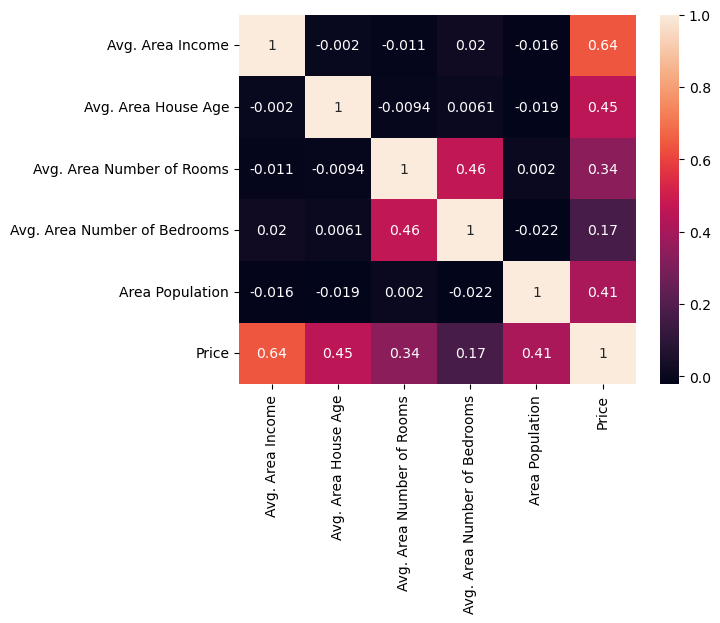

In [5]:
sns.heatmap(data.corr(), annot=True)

In [6]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [7]:
colonnes_a_conserver = ['Avg. Area Income', 'Price']
data = data[colonnes_a_conserver]

In [8]:
data

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


In [9]:
X = data[['Avg. Area Income']]
y = data['Price']

In [10]:
X

,Avg. Area Income
0,79545.458574
1,79248.642455
2,61287.067179
3,63345.240046
4,59982.197226
...,...
4995,60567.944140
4996,78491.275435
4997,63390.686886
4998,68001.331235


In [11]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [14]:
print("x-train Shape :", X_train.shape)
print("x-test Shape :", X_test.shape)
print("y-train Shape :", y_train.shape)
print("y-test Shape :", y_test.shape)

x-train Shape : (3750, 1)
x-test Shape : (1250, 1)
y-train Shape : (3750,)
y-test Shape : (1250,)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
modele_lineaire = LinearRegression()

In [17]:
modele_lineaire.fit(X_train, y_train)

LinearRegression()

In [18]:
y_scores_predits = modele_lineaire.predict(X_test)

In [19]:
y_scores_predits

array([ 851677.60329697, 1164178.78037678, 1145199.03363933, ...,
       1250263.11157632, 1409936.95245215, 1277117.33929848])

In [20]:
y_test

3431    6.129387e+05
2042    1.347083e+06
79      1.492011e+06
4663    1.223915e+06
3640    1.368692e+06
            ...     
347     7.552921e+05
2346    1.226181e+06
509     7.141422e+05
4691    1.554302e+06
3924    1.460451e+06
Name: Price, Length: 1250, dtype: float64

In [21]:
resulats = pd.DataFrame({'y_true': y_test , 'y_pred':y_scores_predits})

In [22]:
resulats

,y_true,y_pred
3431,6.129387e+05,8.516776e+05
2042,1.347083e+06,1.164179e+06
79,1.492011e+06,1.145199e+06
4663,1.223915e+06,1.059808e+06
3640,1.368692e+06,1.328523e+06
...,...,...
347,7.552921e+05,1.012128e+06
2346,1.226181e+06,1.298467e+06
509,7.141422e+05,1.250263e+06
4691,1.554302e+06,1.409937e+06


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
print("MSE de la Regression Lineaire :", mean_squared_error(y_test, y_scores_predits))

MSE de la Regression Lineaire : 73383859199.60913


In [25]:
print("r2_score de la Regression Lineaire :", r2_score(y_test, y_scores_predits))

r2_score de la Regression Lineaire : 0.40611132718398624


In [26]:
import matplotlib.pyplot as plt

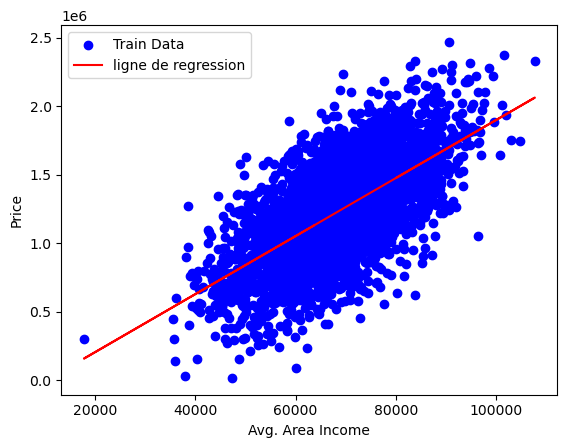

In [27]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train,modele_lineaire.predict(X_train) ,color='red', label='ligne de regression')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
print(modele_lineaire.predict([[150]]))

[-217010.285644]


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
